<a href="https://colab.research.google.com/github/ZemelakGoraga/Text_Analysis/blob/main/Analysis_of_Tweets_from_US_Capitol_Riots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download the Dataset from Kaggle to Google Colab:
!pip install kaggle

In [2]:
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelak","key":"08c8054de361c9898298da09f2007bec"}'}

In [24]:
# Next
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 63 Aug 22 18:55 kaggle.json


In [23]:
# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


# Next

# List a given datasets

!kaggle datasets download -d codebreaker619/80000-tweets-from-us-capitol-riotsjan-6-2021


-rw-r--r-- 1 root root 63 Aug 22 18:55 kaggle.json
80000-tweets-from-us-capitol-riotsjan-6-2021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
# unzip the different data files
# There is one .csv file in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/80000-tweets-from-us-capitol-riotsjan-6-2021.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

tweets.csv


In [18]:
# Download a specific table to work with
# Here, I will download the following table, which contains imported live animals and products:
#  Table to download: "current_FAO/raw_files/Trade_LiveAnimals_E_All_Data_(Normalized).csv", and save it as df

import pandas as pd
from zipfile import ZipFile

# Specify the CSV file to read from the ZIP archive
csv_file_to_read = "tweets.csv"

# Read the ZIP archive
with ZipFile("/content/80000-tweets-from-us-capitol-riotsjan-6-2021.zip", 'r') as zip_file:
    # List the files within the ZIP archive (to double-check paths)
    print(zip_file.namelist())

    # Read the CSV file from the ZIP archive with the specified encoding and delimiter
    with zip_file.open(csv_file_to_read) as csv_file:
        df = pd.read_csv(csv_file, encoding='ISO-8859-1')

['tweets.csv']


In [21]:
df.head()

,tweet_id,text,query,user_id,user_name,follower_count,user_tweet_count,likes,retweets,location_name,latitude,longitude,user_location,date
0,1346863072435179520,we can adjust by population to get crude exces...,death rates,1101487206840057856,nick stripe,12936,1577,255,108,NaN,NaN,NaN,NaN,2021-01-06
1,1346817043232919555,turning to labour or remainers like what would...,death rates,234694571,femi,290982,75187,877,116,NaN,NaN,NaN,NaN,2021-01-06
2,1346862193451692034,numbers of deaths are affected by population s...,death rates,1101487206840057856,nick stripe,12936,1577,213,75,NaN,NaN,NaN,NaN,2021-01-06
3,1346969461190848516,here is a list of governors who preside over s...,death rates,1346952467003568129,NaN,2,120,0,7612,NaN,NaN,NaN,NaN,2021-01-06
4,1346969317569687554,convince me with facts on death rates and infe...,death rates,885891622919184384,NaN,11552,36252,2,0,NaN,NaN,NaN,NaN,2021-01-06


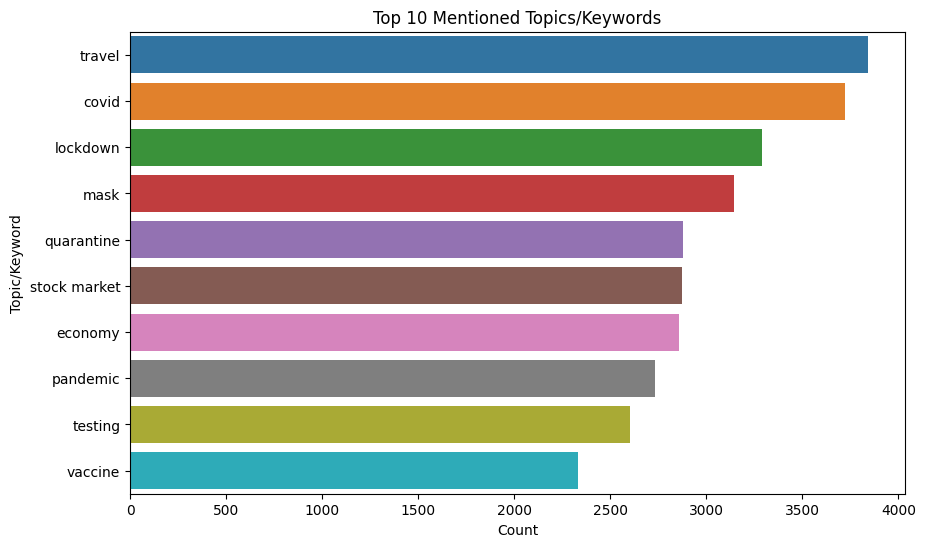

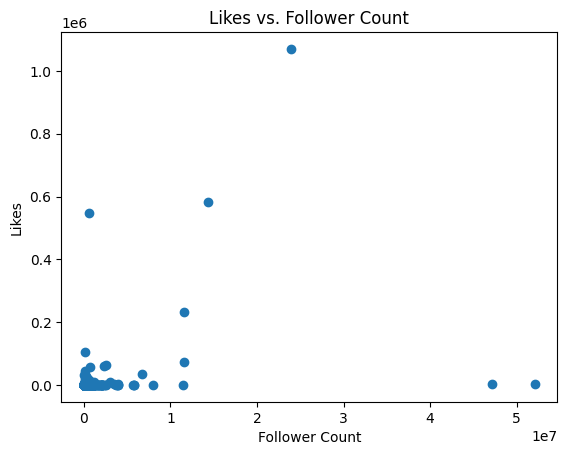

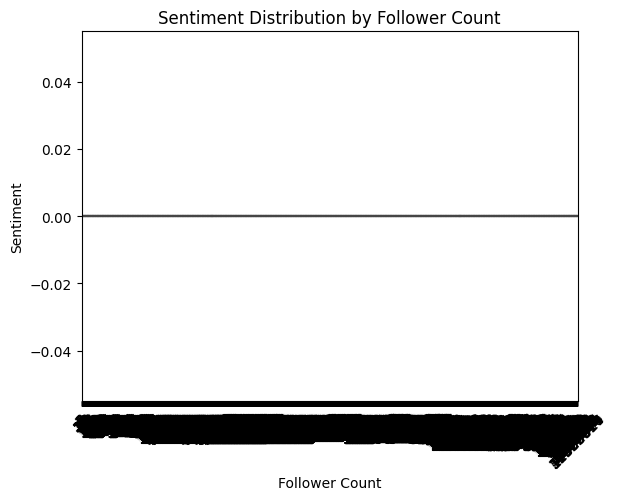

In [27]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming you've already loaded the dataset and named it 'df'

# Drop rows with missing text
df = df.dropna(subset=['text'])

# Initialize spaCy for NER and sentiment analysis
nlp = spacy.load("en_core_web_sm")

# Function to extract entities and sentiments
def extract_entities_sentiments(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    sentiment = doc.sentiment
    return entities, sentiment

# Apply the extract_entities_sentiments function to each row
df[['entities', 'sentiment']] = df['text'].apply(extract_entities_sentiments).apply(pd.Series)

# Data analysis and visualization
# Question 1: Most common topics/keywords
topics_count = df['query'].value_counts()[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=topics_count.values, y=topics_count.index)
plt.title('Top 10 Mentioned Topics/Keywords')
plt.xlabel('Count')
plt.ylabel('Topic/Keyword')
plt.show()

# Question 2: Likes vs. Follower Count
plt.scatter(df['follower_count'], df['likes'])
plt.title('Likes vs. Follower Count')
plt.xlabel('Follower Count')
plt.ylabel('Likes')
plt.show()

# Question 3: Sentiment distribution by follower count
sns.boxplot(x=df['follower_count'], y=df['sentiment'])
plt.title('Sentiment Distribution by Follower Count')
plt.xlabel('Follower Count')
plt.ylabel('Sentiment')
plt.xticks(rotation=45)
plt.show()
